# 04_使用Python进行diy

## 手写数字的数据集 MNIST
> MNIST（Mixed National Institute of Standards and Technology）是一个广泛使用的手写数字数据集
>
> 可以在 https://yann.lecun.com/exdb/mnist 获取

> MNIST 数据库的格式不易使用，因此可以使用其它相对简单的数据文件格式
>
> 参见 https://pjreddie.com/projects/mnist-in-csv

> 以上数据文件可在 `./mnist_dataset/` 下找到

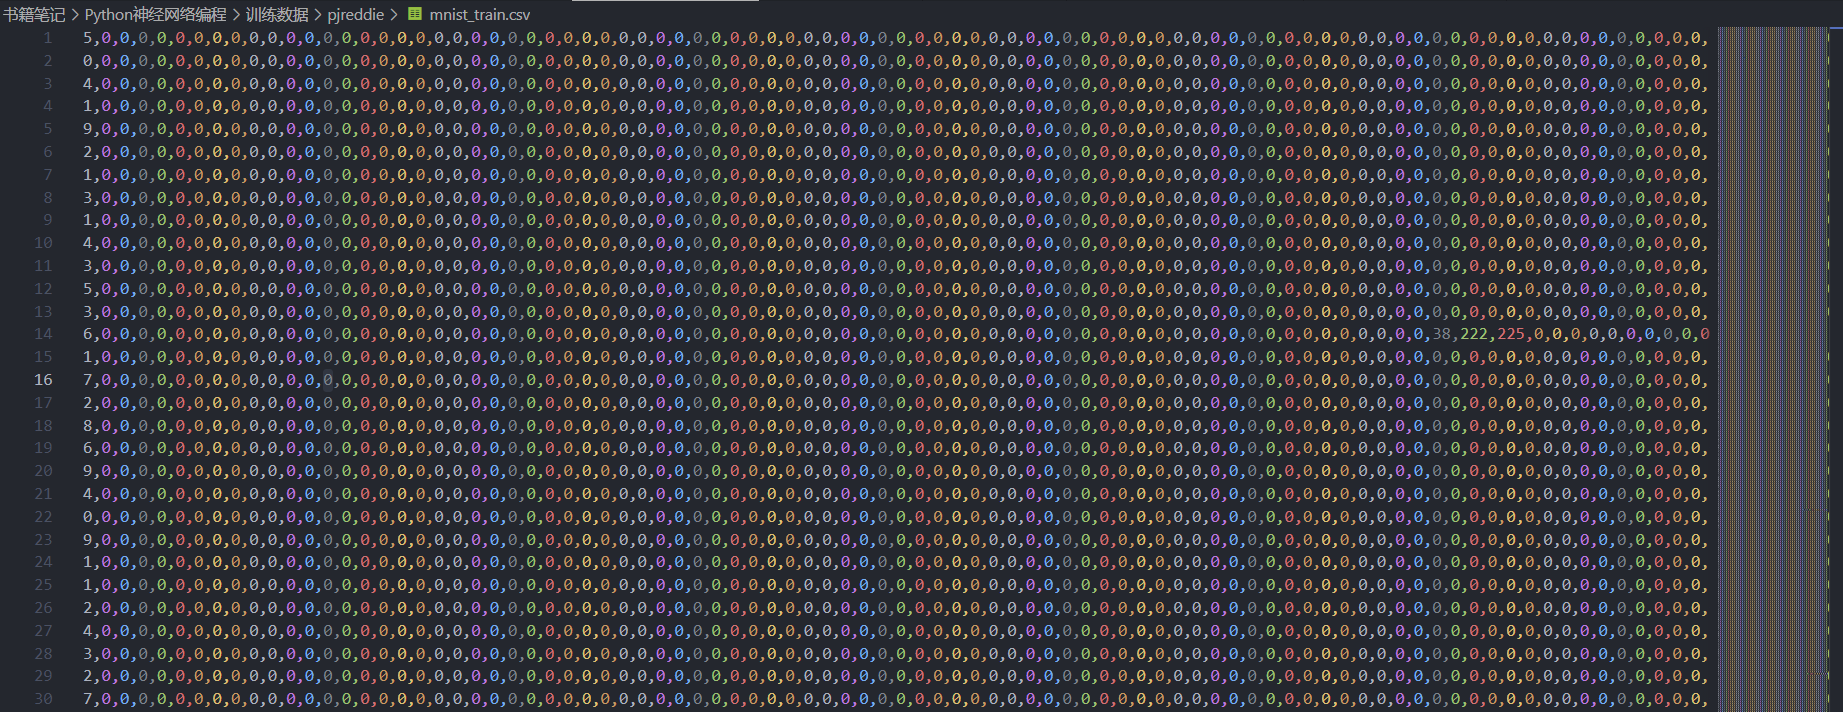
上图是 MNIST测试集 的一部分
- 每一行第一个值是标签，是书写者实际希望表示的数字，也是神经网络应该学习得到的正确答案。
- 随后的值是手写数字的像素值，尺寸为 28*28 。

在深入进行训练操作之前，可以尝试使用较小的子集来试验、开发。
以下是作者提供的链接，也可在 `./mnist_dataset/mini/` 下找到
> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv
>
> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv

## 使用Python读取文件

In [127]:
with open('./mnist_dataset/mini/mnist_train_100.csv', 'r') as data:
    data_list = data.readlines() # 以换行分割数据为数组
    for i in data_list:
        print(i)

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

可以通过先前的matplotlib库的imshow()绘制出相应的图片

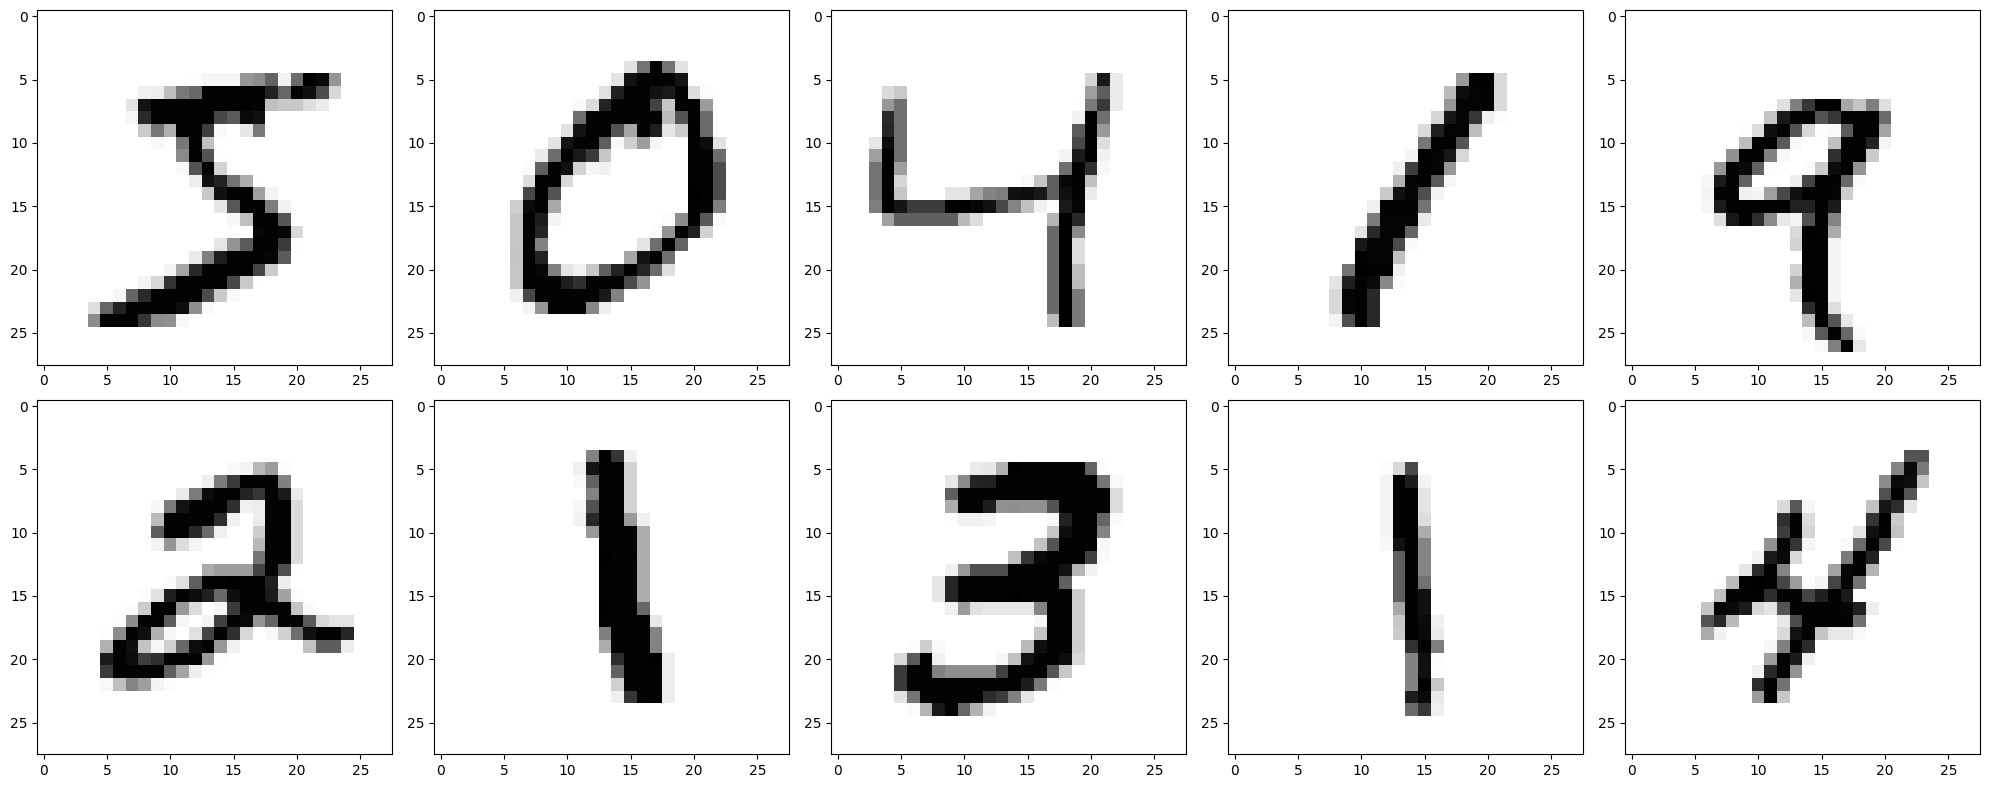

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# val = data_list[0].split(',')
# img_arr = np.asfarray(val[1:]).reshape((28, 28))
# plt.imshow(img_arr, cmap='Greys', interpolation='None')

# 创建一个2x2的子图布局
# fig, axes = plt.subplots(nrows=2, ncols=2)
#  长5，宽2，20x8 英寸
# plt.subplots()函数返回一个包含图形组和子图对象的元组。图形组被存储在fig变量中，而子图对象被存储在axes变量中。
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 8))
# 循环遍历数据列表中的图像数据并在每个子图中绘制图像
all_val =  []
for i, ax in enumerate(axes.flat):
    val = data_list[i].split(',')
    # all_val.append(','.join(str(e) for e in val))
    all_val.append(val)
    img_arr = np.asfarray(val[1:]).reshape((28, 28))
    ax.imshow(img_arr, cmap='Greys', interpolation='None')
    # ax.set_title(f'Image {i+1}')

# 调整子图布局和间距
plt.tight_layout()
plt.show()


## 准备MNIST训练数据

我们需要做的第一件事是将输入的颜色值从较大的 0~255 缩小至 0.01~1.0
> 使用0.01作为范围最低点，是为了避免0值输入造成权重无法更新
>
> 没有使用0.99作为输入的上限值，是因为不需要避免输入1.0会造成这种问题，只需要避免输出为1.0

In [129]:
# 定义函数，使输入的0~255的值转为0.01~1.0范围内的值
def normalize_input(num):
    return num/255 * 0.99 + 0.01

# print('0: {zero}'.format(zero=normalize_input(0)))

tup_test = (0, 1, 255)
# f-string，类似于js `${变量&语句}`

str_test = ''
for i in tup_test:
    str_test += f'{str(i).zfill(3)}: {normalize_input(i):.3f}\n'

print(str_test)

000: 0.010
001: 0.014
255: 1.000



In [130]:
with open('data.csv', 'w') as data:
    arr = np.asfarray(data_list[0].split(',')[1:]) / 255 * 0.9 + 0.01
    data.write(','.join(str(e) for e in arr))
# (np.asfarray(data_list[0].split(',')[1:]) / 255 * 0.9 + 0.01)

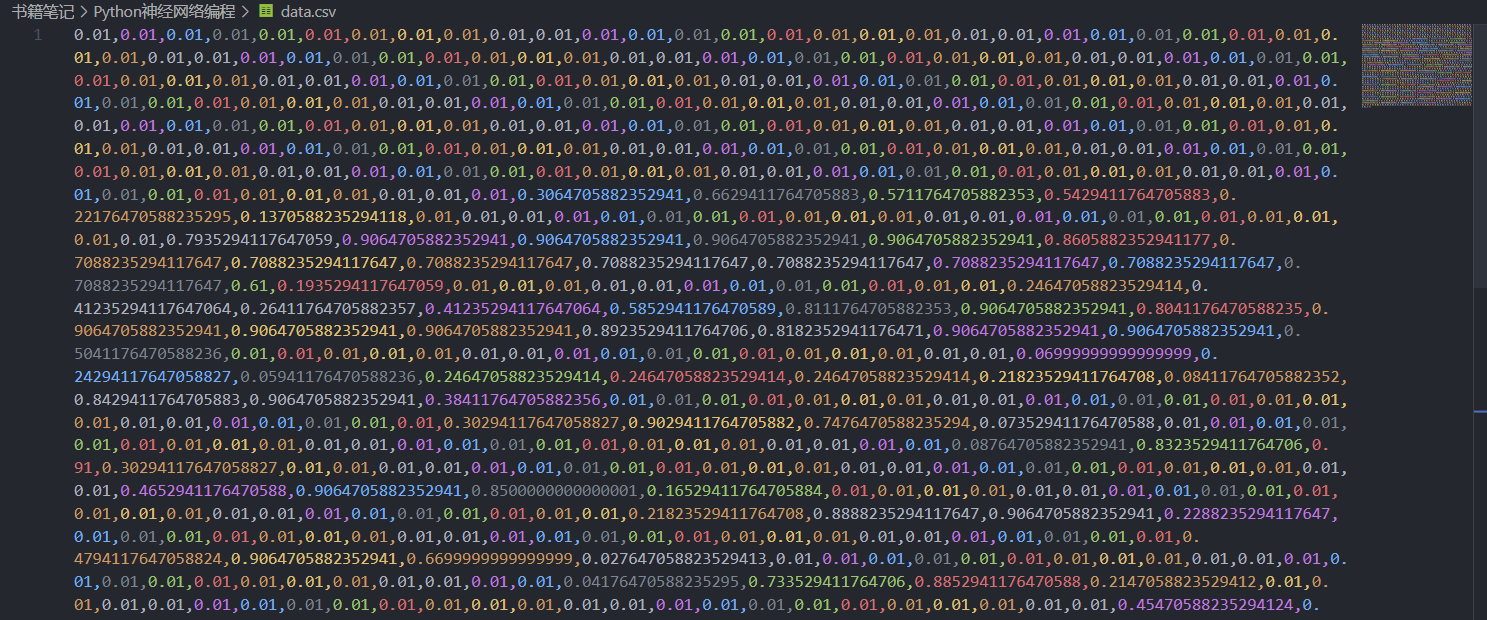

 通过对图像进行分类，分配正确的标签。这些标签是0~9共10个数字中的一个。
 这意味着神经网络应该有10个输出节点，每个节点对应一个可能的答案或标签

 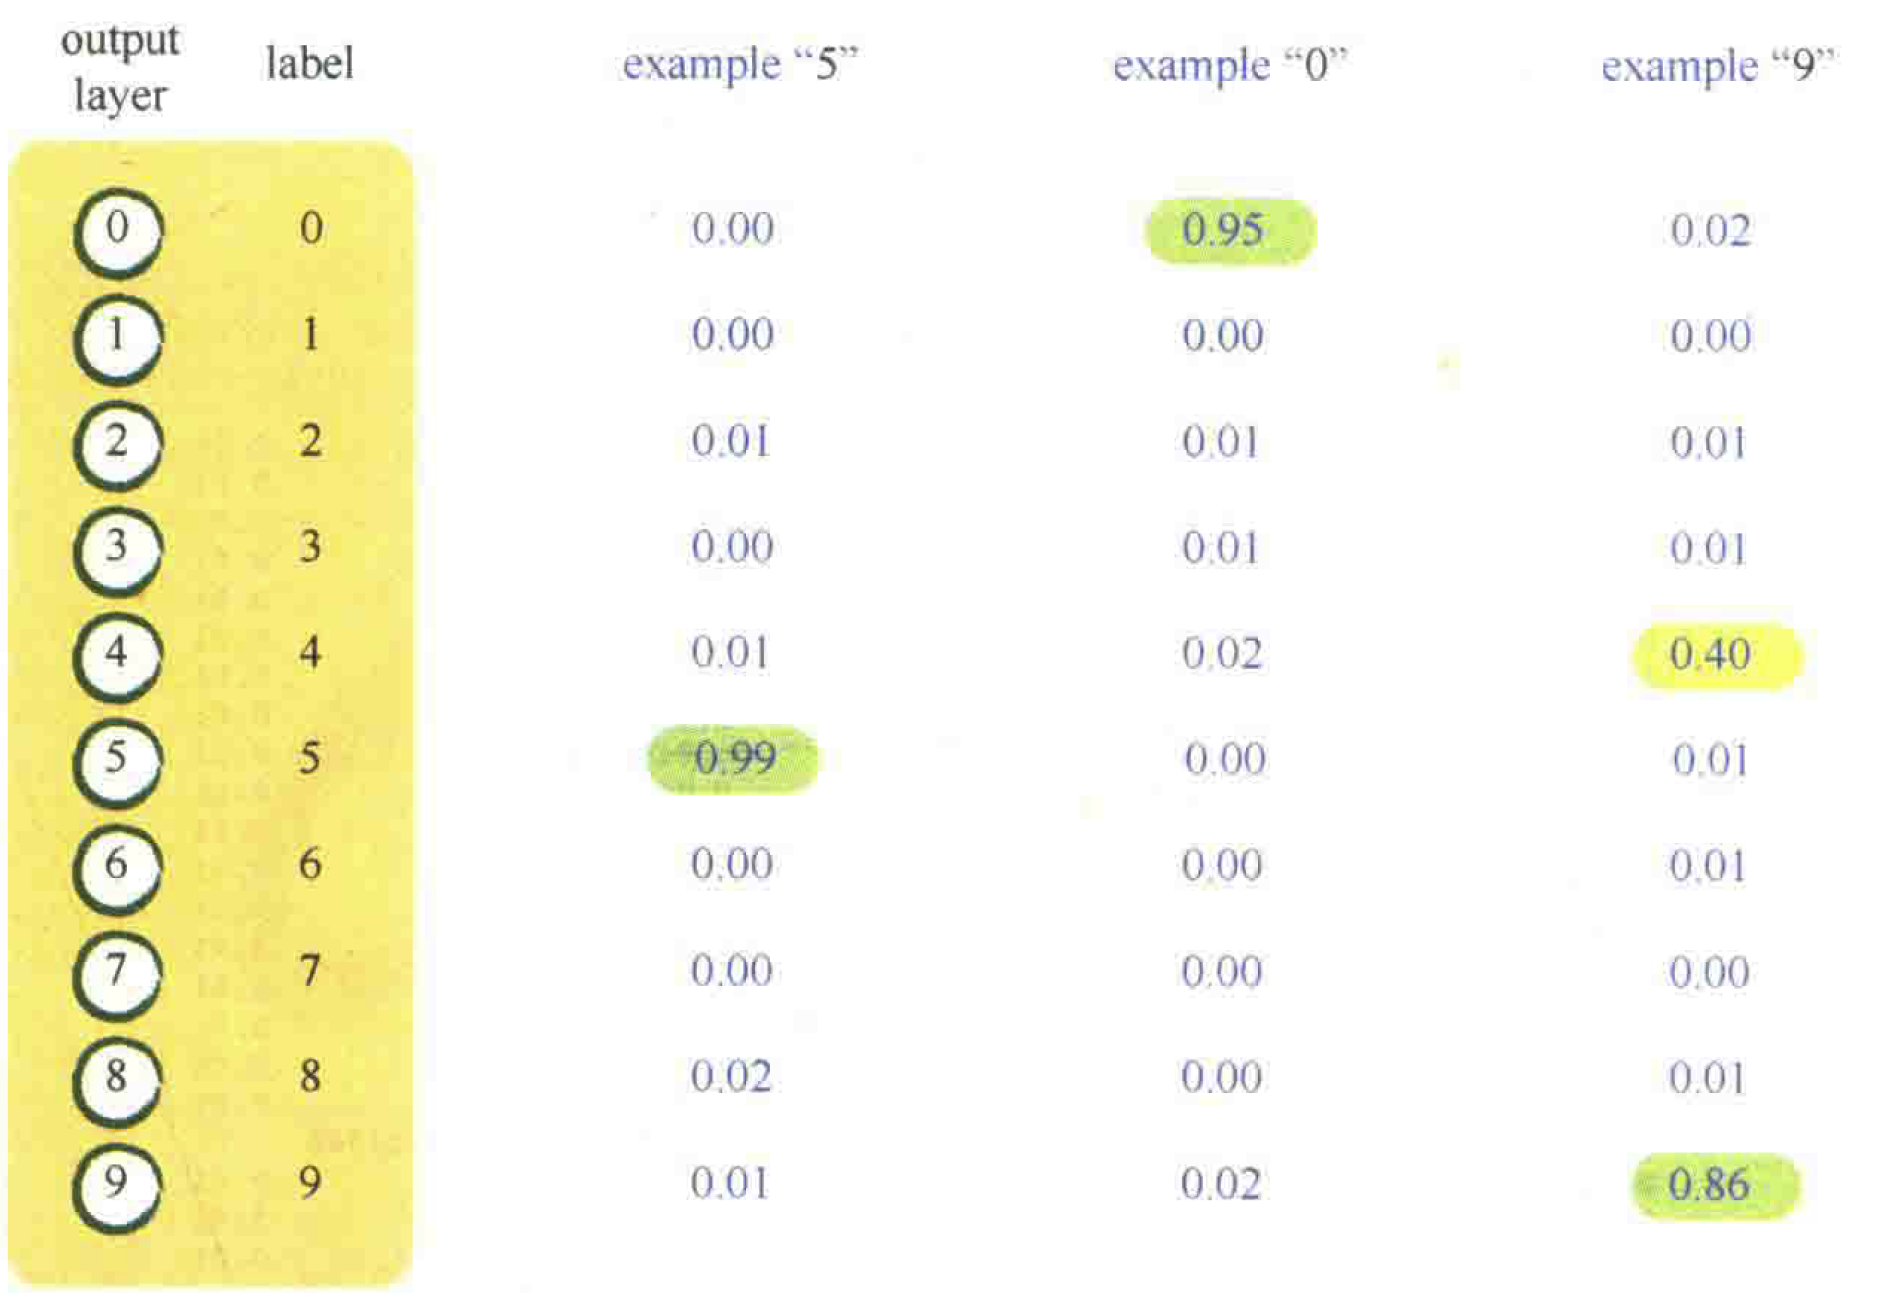


In [131]:
# 以第一行数据作为目标值
target_val = data_list[0].split(',')
target_val = [target_val[:1], np.asfarray(target_val[1:]) / 255 * 0.9 + 0.01]

# 输出节点数量
output_node = 10
target = np.zeros(output_node) + 0.01
target[int(target_val[0][0])] = 0.99 # 如果目标是数字5，那么 target[6] = 0.99

# target_val = target_val[1]

print(target)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
